In [1]:
import numpy as np 
import pandas as pd 
from sklearn.datasets import load_iris
data=load_iris()

In [3]:
df=pd.DataFrame(data.data,columns=data.feature_names)

In [4]:
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [5]:
df['Species']=data.target
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),Species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [13]:
target=np.unique(data.target)
print(target)

[0 1 2]


In [14]:
target_names=np.unique(data.target_names)
print(target_names)

['setosa' 'versicolor' 'virginica']


In [15]:
targets=dict(zip(target,target_names))
df['Species']=df['Species'].replace(targets)
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),Species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [9]:
x=df.drop(columns="Species")
y=df["Species"]
feature_names=x.columns
labels=y.unique()

In [10]:
from sklearn.model_selection import train_test_split
X_train, test_x,y_train,test_lab=train_test_split(x,y,test_size=0.4,random_state=42)

from sklearn.tree import DecisionTreeClassifier

clf=DecisionTreeClassifier(criterion='entropy',max_depth=3,random_state=42)
clf.fit(X_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=42)

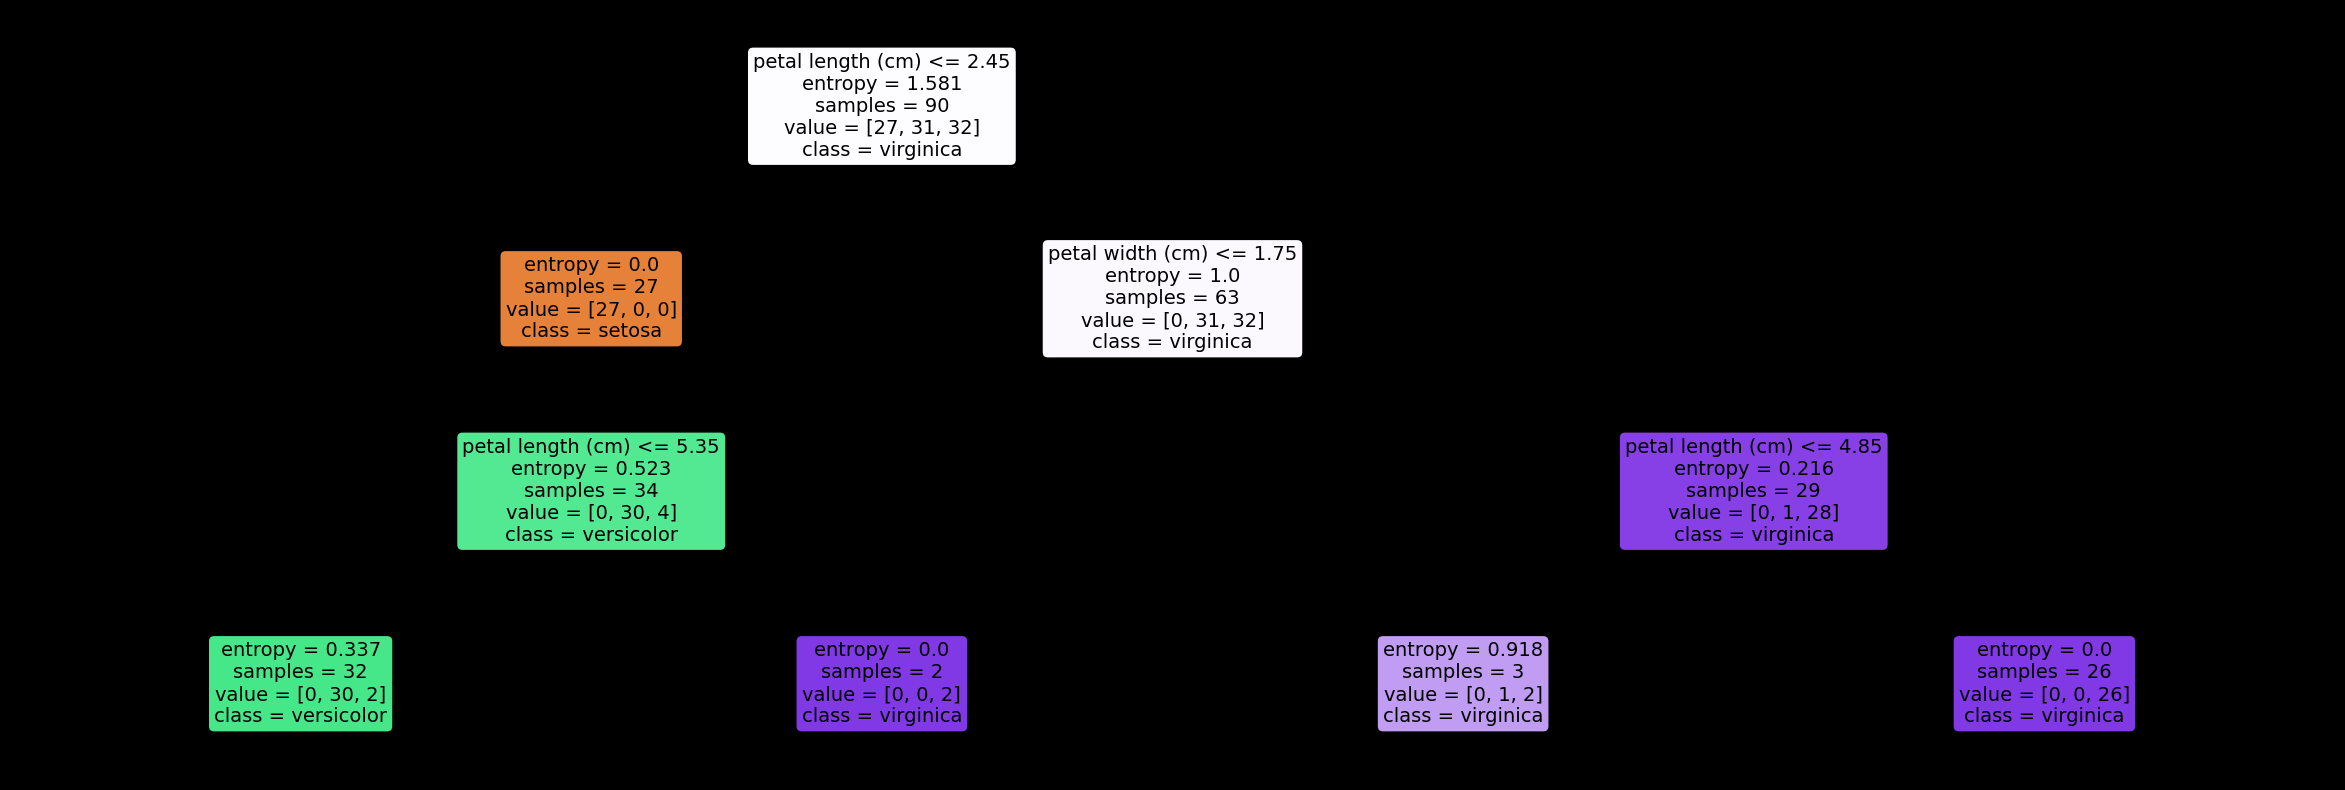

In [12]:
from sklearn import tree
import matplotlib.pyplot as plt

plt.figure(figsize=(30,10), facecolor ='k')

a = tree.plot_tree(clf,feature_names = feature_names, class_names = labels, rounded = True, filled = True,fontsize=14)

plt.show()

In [16]:
from sklearn.tree import export_text

tree_rules = export_text(clf,feature_names = list(feature_names))

print(tree_rules)

|--- petal length (cm) <= 2.45
|   |--- class: setosa
|--- petal length (cm) >  2.45
|   |--- petal width (cm) <= 1.75
|   |   |--- petal length (cm) <= 5.35
|   |   |   |--- class: versicolor
|   |   |--- petal length (cm) >  5.35
|   |   |   |--- class: virginica
|   |--- petal width (cm) >  1.75
|   |   |--- petal length (cm) <= 4.85
|   |   |   |--- class: virginica
|   |   |--- petal length (cm) >  4.85
|   |   |   |--- class: virginica



In [17]:
# Predict Class From Test Values
test_pred_decision_tree = clf.predict(test_x)

In [18]:
from sklearn import metrics

import seaborn as sns

import matplotlib.pyplot as plt

confusion_matrix = metrics.confusion_matrix(test_lab,  test_pred_decision_tree)

matrix_df = pd.DataFrame(confusion_matrix)

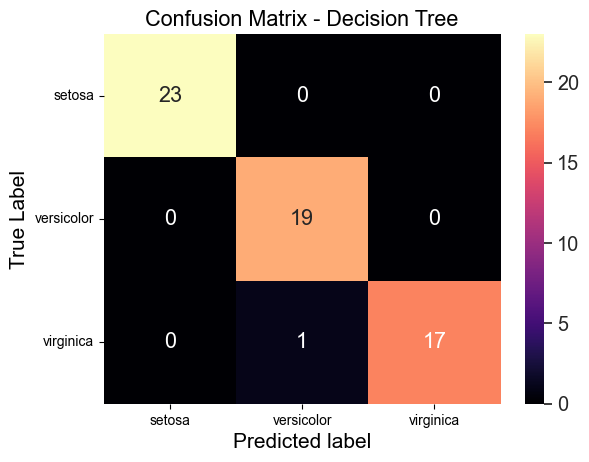

<Figure size 1000x700 with 0 Axes>

In [19]:
ax = plt.axes()

sns.set(font_scale=1.3)

plt.figure(figsize=(10,7))

sns.heatmap(matrix_df, annot=True, fmt="g", ax=ax, cmap="magma")

ax.set_title('Confusion Matrix - Decision Tree')

ax.set_xlabel("Predicted label", fontsize =15)

ax.set_xticklabels(['']+labels)

ax.set_ylabel("True Label", fontsize=15)

ax.set_yticklabels(list(labels), rotation = 0)

plt.show()